In [6]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [7]:
df=pd.read_csv("C:\\Users\\Pro\\Desktop\\twitter-suicidal_data.csv")

In [8]:
df.head()

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


In [9]:
df['intention'].value_counts()

0    5121
1    3998
Name: intention, dtype: int64

# Data visulization

C:\Users\Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='intention', ylabel='count'>

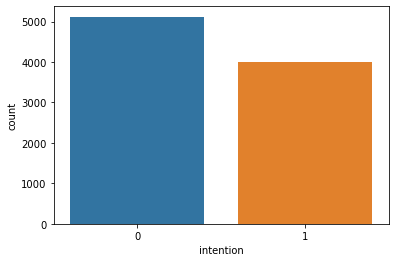

In [10]:
sns.countplot(df['intention'])

# Data cleaning

In [11]:
def _remove_special_chars(x):
    x = re.sub(r'[^\w ]+', "", x)
    return x

In [7]:
df['tweet']=df['tweet'].apply(lambda x:_remove_special_chars(x))


In [8]:
def _remove_emails(x):
    return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)
df['tweet']=df['tweet'].apply(lambda x:_remove_emails(x))
 

In [9]:
df.head()

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


# Feature Extraction

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
yTf=TfidfVectorizer(max_features=20000,ngram_range=(1,3),analyzer='char')
Tf


TfidfVectorizer(analyzer='char', max_features=20000, ngram_range=(1, 3))

In [15]:
X=Tf.fit_transform(df['tweet'])
y=df['intention']


# Data spliting

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
clf.fit(x_train,y_train)

LinearSVC()

In [15]:
y_pred=clf.predict(x_test)

In [16]:
print(confusion_matrix(y_test,y_pred))

[[994  66]
 [ 64 700]]


<AxesSubplot:>

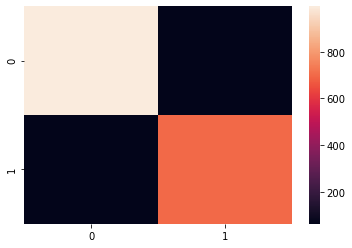

In [17]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred))

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1060
           1       0.91      0.92      0.92       764

    accuracy                           0.93      1824
   macro avg       0.93      0.93      0.93      1824
weighted avg       0.93      0.93      0.93      1824



In [19]:
x='no one cares about me . i will die alone'
vec=Tf.transform([x])
clf.predict(vec)

array([1], dtype=int64)

In [20]:
a="i'm so happy "
vec=Tf.transform([a])
clf.predict(vec)


array([0], dtype=int64)